In [1]:
import seaborn as sns 
import pandas as pd 

In [4]:
#importing data using pandas
df = pd.read_csv('sales_with_nans.csv')
df.head(20)

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes
5,Treatment,NaN,135.573003,218.559988,58.075342,69.404918,No
6,Control,High Value,191.713918,222.409356,89.967827,85.120975,Yes
7,Control,Low Value,173.752555,213.168232,66.984711,67.881558,NaN
8,NaN,High Value,208.308577,248.178830,95.366670,84.790294,Yes
9,Treatment,High Value,235.071493,352.756872,72.919851,70.753225,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [7]:
#figuring out how many empty values are in each field 
df.isna().sum()

Group                           1401
Customer_Segment                1966
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Purchase_Made                    805
dtype: int64

In [13]:
#dropping rows that have empty values
df_d = df.dropna(subset=['Customer_Segment', 'Group', 'Sales_After', 'Sales_Before', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'Purchase_Made' ])
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3412 entries, 1 to 9992
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         3412 non-null   object 
 1   Customer_Segment              3412 non-null   object 
 2   Sales_Before                  3412 non-null   float64
 3   Sales_After                   3412 non-null   float64
 4   Customer_Satisfaction_Before  3412 non-null   float64
 5   Customer_Satisfaction_After   3412 non-null   float64
 6   Purchase_Made                 3412 non-null   object 
dtypes: float64(4), object(3)
memory usage: 213.2+ KB


In [19]:
#creating a pivot table to see if the campaign had an affect on sales and customer satisfaction
group_mod_colour4 = df_d.groupby('Group').agg(
    avg_sales_before=('Sales_Before', 'mean'),
    avg_sales_after=('Sales_After', 'mean'),
    avg_sat_before=('Customer_Satisfaction_Before', 'mean'),
    avg_sat_after=('Customer_Satisfaction_After', 'mean'),
    num_sales=('Purchase_Made', 'count'),
).reset_index()
group_mod_colour4.head(20)

,Group,avg_sales_before,avg_sales_after,avg_sat_before,avg_sat_after,num_sales
0,Control,203.413349,243.229615,70.480401,74.199256,1702
1,Treatment,204.349375,317.851870,70.036999,73.716707,1710


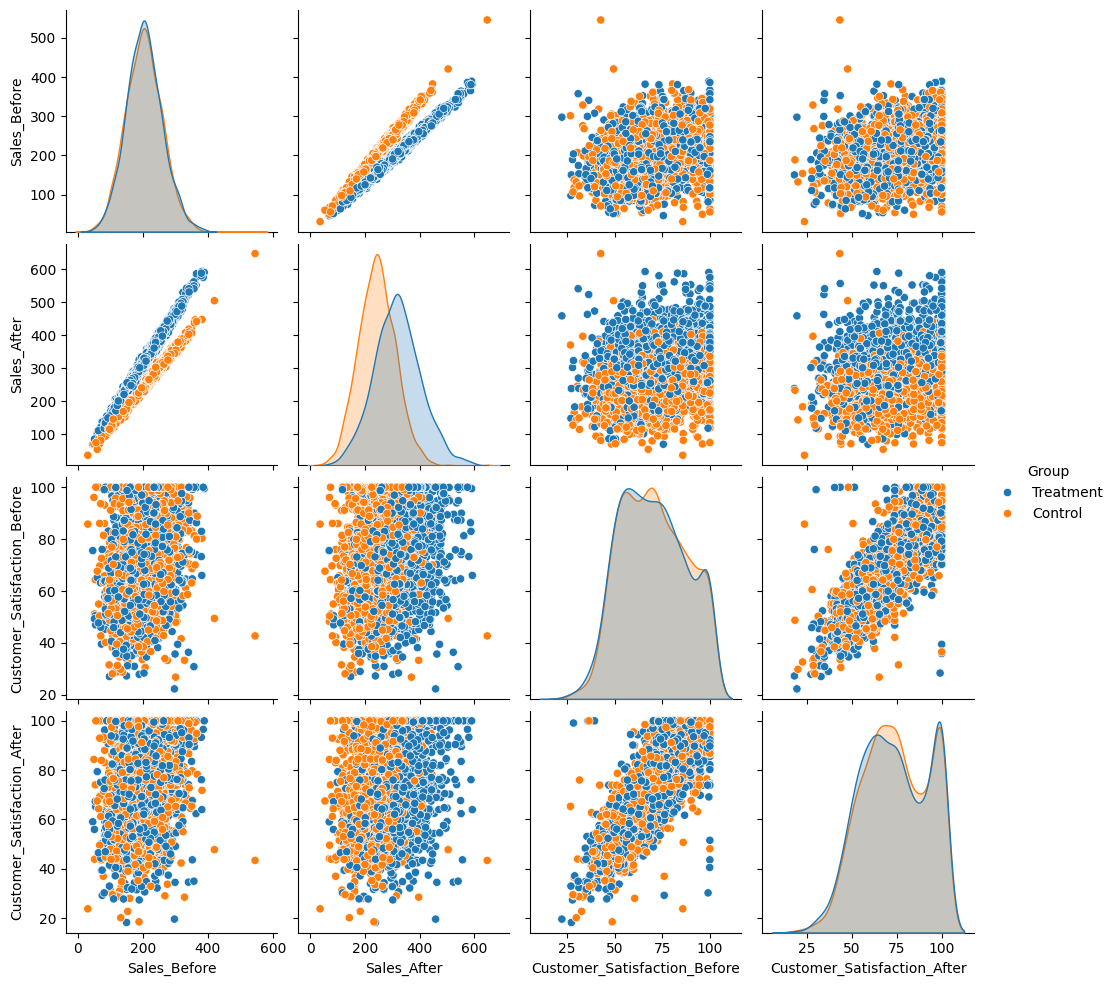

In [24]:
sns.pairplot(df_d, hue='Group')

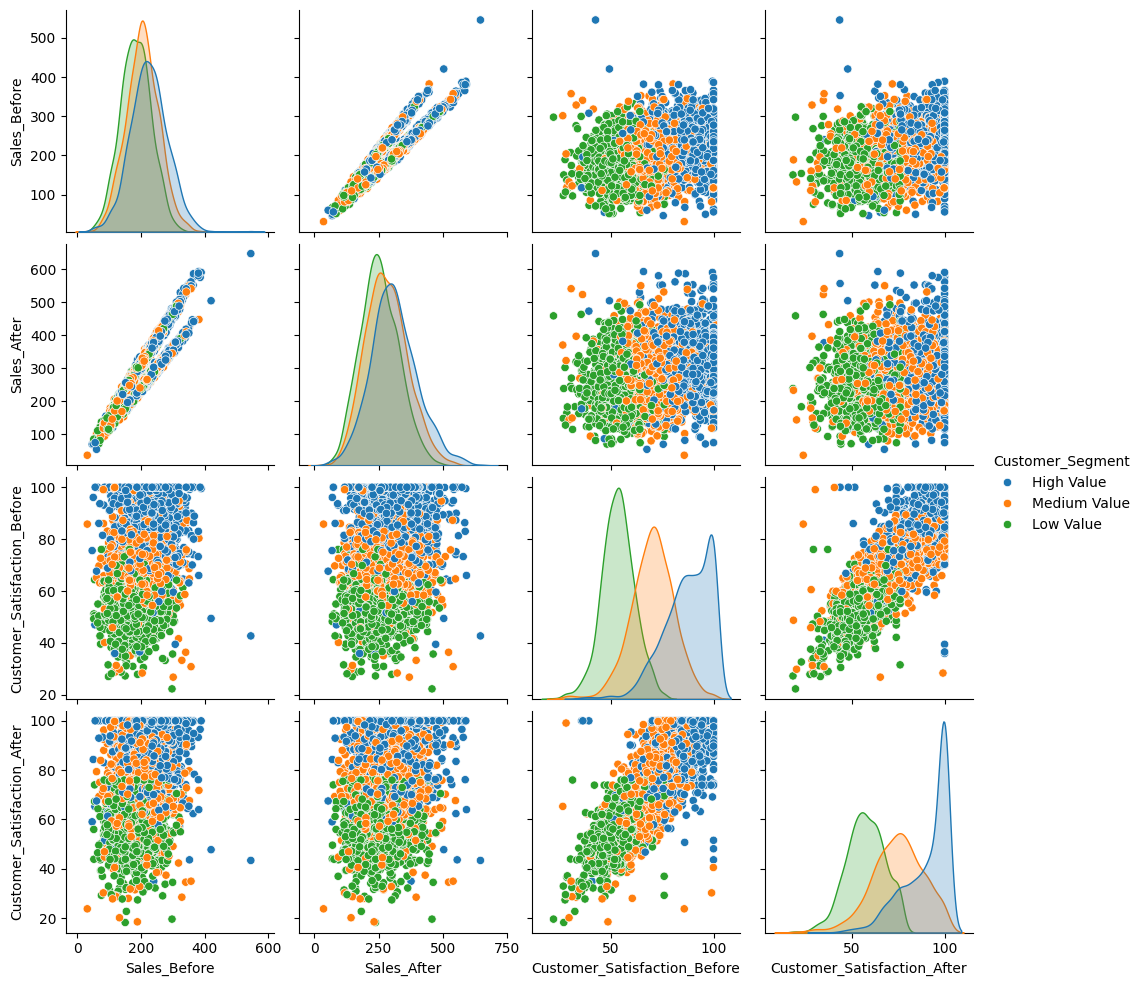

In [26]:
sns.pairplot(df_d, hue='Customer_Segment')

In [ ]:
#creating a heat map to spot any quick correlations 
